In [1]:
import pandas as pd 
import functions as f


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("./data/train.csv")
stores = pd.read_csv("./data/store.csv")

data.Date = pd.to_datetime(data.Date)
data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [3]:
data.shape

(637774, 9)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,618473.0,558.105623,321.885545,1.0,279.0,558.0,837.0,1115.0
DayOfWeek,618757.0,3.994914,1.997485,1.0,2.0,4.0,6.0,7.0
Sales,618747.0,5668.015834,3809.655137,0.0,3640.0,5625.0,7714.0,38037.0
Customers,618683.0,628.909831,463.786905,0.0,397.0,604.0,833.0,7388.0
Open,618588.0,0.829167,0.376363,0.0,1.0,1.0,1.0,1.0
Promo,618580.0,0.370447,0.482925,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,618437.0,0.173253,0.378466,0.0,0.0,0.0,0.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           637774 non-null  datetime64[ns]
 1   Store          618473 non-null  float64       
 2   DayOfWeek      618757 non-null  float64       
 3   Sales          618747 non-null  float64       
 4   Customers      618683 non-null  float64       
 5   Open           618588 non-null  float64       
 6   Promo          618580 non-null  float64       
 7   StateHoliday   618520 non-null  object        
 8   SchoolHoliday  618437 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 43.8+ MB


In [6]:
data.isnull().sum()/len(data)

Date             0.000000
Store            0.030263
DayOfWeek        0.029818
Sales            0.029833
Customers        0.029934
Open             0.030083
Promo            0.030095
StateHoliday     0.030189
SchoolHoliday    0.030320
dtype: float64

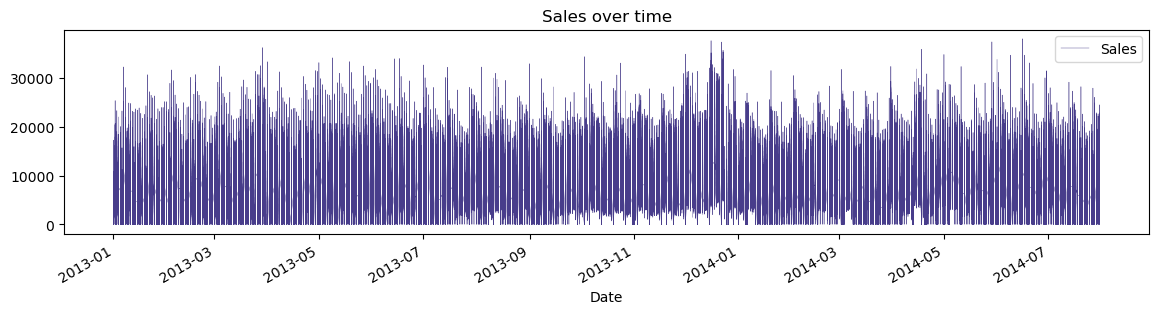

In [7]:
data.plot('Date', 'Sales',  color='darkslateblue', figsize=(14, 3), title='Sales over time', linewidth=0.3);

In [8]:
df_resample = data.set_index('Date')
df_M = df_resample.resample('M').mean()

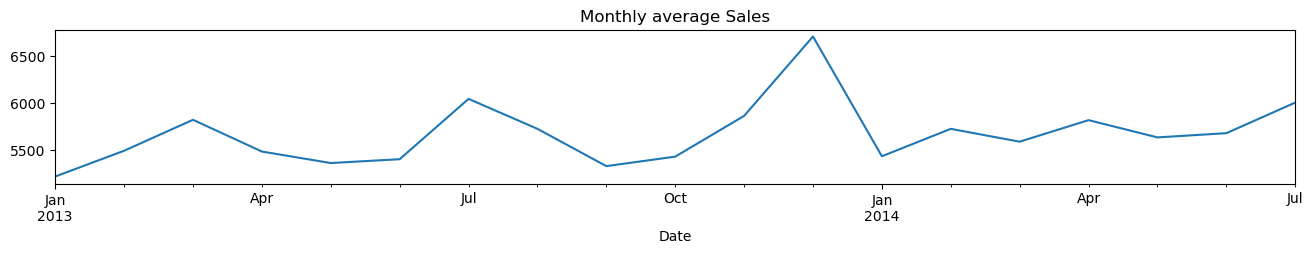

In [9]:
df_M.Sales.plot(figsize=(16,2), title='Monthly average Sales');

In [10]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
df = f.merging_store_and_data(data)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,618473.0,558.105623,321.885545,1.0,279.0,558.0,837.0,1115.0
DayOfWeek,600036.0,3.994974,1.997527,1.0,2.0,4.0,6.0,7.0
Sales,600028.0,5667.469356,3809.436273,0.0,3639.0,5625.0,7713.0,38037.0
Customers,599957.0,628.818459,463.765657,0.0,397.0,604.0,833.0,7388.0
Open,599832.0,0.829070,0.376448,0.0,1.0,1.0,1.0,1.0
Promo,599791.0,0.370379,0.482907,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,599686.0,0.173259,0.378471,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,616838.0,5412.023773,7673.525463,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,422043.0,7.224053,3.210645,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,422043.0,2008.673521,6.140044,1900.0,2006.0,2010.0,2013.0,2015.0


In [13]:
df.isnull().sum()/len(df)

Date                         0.000000
Store                        0.000000
DayOfWeek                    0.029811
Sales                        0.029823
Customers                    0.029938
Open                         0.030140
Promo                        0.030207
StateHoliday                 0.030074
SchoolHoliday                0.030376
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002644
CompetitionOpenSinceMonth    0.317605
CompetitionOpenSinceYear     0.317605
Promo2                       0.000000
Promo2SinceWeek              0.490959
Promo2SinceYear              0.490959
PromoInterval                0.490959
dtype: float64

In [14]:
df.shape

(618473, 18)

In [15]:
# have a validation data set to test your data before teh final test 
# stratify and shuffle assures that both splits have every Store present

from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Store'], shuffle=True)

In [16]:
val_df.shape
train_df.shape

(432931, 18)

In [17]:
train_df.Store.nunique(), val_df.Store.nunique()

(1115, 1115)

In [18]:
train_df = f.cleaner(train_df)
train_df = f.fix_date(train_df)
train_df = f.downcaster(train_df)

In [19]:
train_df.dtypes
train_df

Year                            int16
Month                            int8
Day                              int8
Store                           int16
Sales                           int32
Customers                       int16
Promo                            int8
StateHoliday                 category
SchoolHoliday                 float64
StoreType                    category
Assortment                   category
CompetitionDistance             int32
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                           int8
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
dtype: object

<AxesSubplot:>

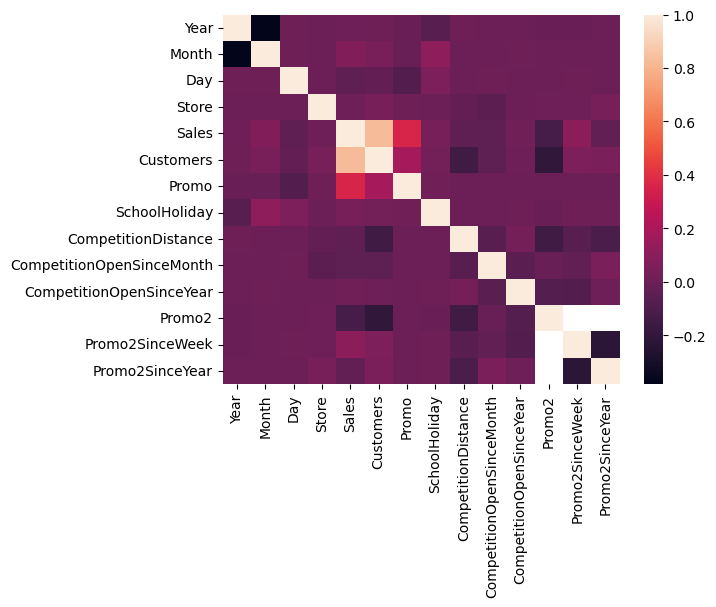

In [20]:
import seaborn as sns
sns.heatmap(train_df.corr())

In [21]:
train_df.head()

,Year,Month,Day,Store,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
239479,2013,10,25,221,6068,620,1,0,0.0,d,c,13530,9.0,2013.0,0,NaN,NaN,NaN
137441,2014,1,22,473,4151,559,1,0,0.0,a,a,50,NaN,NaN,0,NaN,NaN,NaN
99436,2013,2,5,547,5061,399,1,0,0.0,d,c,8990,11.0,2009.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
194517,2013,9,26,16,8030,898,0,0,0.0,a,c,3270,NaN,NaN,0,NaN,NaN,NaN
1734,2013,2,21,377,6710,903,1,0,0.0,a,c,100,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"


In [22]:
train_df = f.reduce_features(train_df)
train_df.head()

,Sales,Customers,Promo,StoreType,Assortment,CompetitionDistance,Promo2
239479,6068,620,1,d,c,13530,0
137441,4151,559,1,a,a,50,0
99436,5061,399,1,d,c,8990,1
194517,8030,898,0,a,c,3270,0
1734,6710,903,1,a,c,100,1


In [23]:
train_df.isnull().sum()/len(train_df)

Sales                  0.0
Customers              0.0
Promo                  0.0
StoreType              0.0
Assortment             0.0
CompetitionDistance    0.0
Promo2                 0.0
dtype: float64

In [24]:
train_df.Promo2.unique()
train_df.Promo.unique()
train_df.Assortment.unique()
train_df.StoreType.unique()

['d', 'a', 'c', 'b']
Categories (4, object): ['a', 'b', 'c', 'd']

## Category Encoding

In [25]:
from sklearn.compose import ColumnTransformer
import category_encoders as ce 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [26]:
X = train_df.drop(columns=['Sales', ])
y = train_df.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X.head(3)

,Customers,Promo,StoreType,Assortment,CompetitionDistance,Promo2
239479,620,1,d,c,13530,0
137441,559,1,a,a,50,0
99436,399,1,d,c,8990,1


In [28]:
# Initialize the OrdinalEncoder with the mapping
le = ce.OrdinalEncoder(mapping=[{'col': 'Assortment', 'mapping': {'a': 0, 'b': 1, 'c': 2}},
                                {'col': 'StoreType',  'mapping': {'a': 0, 'b': 1, 'c': 2, 'd':3}}])

ohe = ce.OneHotEncoder(cols=['Promo', 'Promo2'])

In [29]:
#set up the column transfomer
ct = ColumnTransformer([
        ('transformer', Normalizer(norm='l1'), ['Customers','CompetitionDistance']) 
        
        ], remainder='passthrough')

In [30]:
from sklearn.linear_model import LinearRegression

#Build pipeline
pipe_lc = Pipeline([('ordinal_encoder', le), 
                    ('one_hot',ohe), 
                    ('transformer', ct),
                    ('linear', LinearRegression())])

#fit the pipeline
pipe_lc.fit(X_train,y_train)

#make predictions
preds_lc = pipe_lc.predict(X_test)

In [33]:
f.rmspe(preds_lc, y_test)

48.72301627809944

In [35]:
from sklearn.ensemble import RandomForestRegressor

#instantiate rf model
rf = RandomForestRegressor(max_depth=6, random_state=42, n_estimators=400, n_jobs=-1, verbose=1)

#Build pipeline
pipe_rf = Pipeline([('ordinal_encoder', le), 
                    ('one_hot',ohe), 
                    ('transformer', ct),
                    ('linear', rf)])

#fit the pipeline
pipe_rf.fit(X_train, y_train)

#make predictions
pred_rf = pipe_lc.predict(X_test)
f.rmspe(pred_rf, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   19.4s finished


48.72301627809944